<a href="https://colab.research.google.com/github/ma-prietoo/SyS-2025-2/blob/main/Parcial%201/Parcial1_Sys_2025_2_MariaPrieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
from scipy.spatial.distance import cdist

# Ejercicio 1.

La distancia media entre dos señales periódicas
x1(t) ∈ R,C y x2(t) ∈ R,C; se puede expresar a
partir de la potencia media de la diferencia entre ellas:

$$
d^2(x_1, x_2) = P_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt
$$

Sea \$ x_1(t)\ y \ x_2(t) \$ dos señales definidas como:

$
x_1(t) = A e^{-j n w_0 t} \ y \
x_2(t) = B e^{j m w_0 t}
$

con

$$
w_0 = \frac{2\pi}{T}; \quad T, A, B \in \mathbb{R}^+ \text{ y } n, m \in \mathbb{Z}.
$$

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.




In [18]:
# Definir simbolos -> t: tiempo, T: Periodo, A y B: amplitudes, nym: armónicos
t, T, A, B = sym.symbols('t T A B', real = True, positive = True)   # real y positive = True -> valores en R+
n, m = sym.symbols('n m', real = True, integer=True)   # integer -> Permite al sympy usar identidades al momento de integrar
w0 = 2*sym.pi/T   # w0: Frecuencia angular fundamental

# Definir señales
x1 = A*sym.exp(-sym.I*n*w0*t)   # sim.I (sympy) = j (numpy)
x2 = B*sym.exp(sym.I*m*w0*t)

# Calcular Potencia de cada señal
Px1 = (1/T)*sym.integrate(x1*sym.conjugate(x1), (t, 0, T))   # integrate -> integra
Px2 = (1/T)*sym.integrate(x2*sym.conjugate(x2), (t, 0, T))   # conjugate -> conjugado

# Calcular cruzado 1y2
C12 = (-2/T)*sym.integrate(x1*sym.conjugate(x2), (t, 0, T))
C12_simpl = sym.simplify(C12)   # simplify -> simplifica la ecuacion

sym.sqrt(Px1 + Px2 + C12_simpl)

sqrt(A**2 + B**2 + Piecewise((0, Ne(m, -n)), (-2*A*B, True)))

# Ejercicio 2

Encuentre la señal en tiempo discreto al utilizar un conversor analógico–digital con frecuencia de muestreo de **5 kHz** y **4 bits** de capacidad de representación, aplicado a la señal continua:

$$
x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)
$$

Realizar la simulación del proceso de discretización (incluyendo al menos tres períodos de x(t) ).  
En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


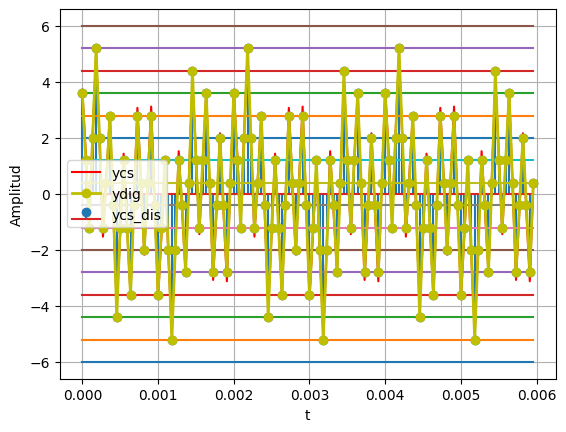

In [19]:
#Ejemplo de señal despues de cero y pendiente y discretización
from scipy.spatial.distance import cdist

# crear función en python
def my_ceropen(x, ymin=-5, ymax=5):   # en general se pueden deefinir valores por defecto
  '''
  Código base paa simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min y max después de cero y pendiente
  '''
  xmax = max(x)   # x.max()
  xmin = min(x)   # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

# funcion cuantización punto a punto
def my_cuantizador(yn, vc):   # yn punto a # cuantizar, vq vector de estados
  Ne = vc.shape[0]   # tamaño de vector de estados
  dn = cdist(yn.reshape(-1, 1), vc.reshape(-1, 1))   # distancia yn a vector estados, reshape(-1, 1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn)   # posición distancia min
  return vc[ind]

Fs = 22000   # Frecuencia ejercicio
Ts = 1/Fs
T = 1 / 500   # periodo cuasiperiódica
t = np.arange(0, 3*T, Ts)   # simulando discretización
w1 = 1000*np.pi
w2 = 3000*np.pi
w3 = 11000*np.pi
x = 3*np.cos(w1*t) + 5*np.sin(w2*t) + 10*np.cos(w3*t)

rmin = -6
rmax = 6
ycs = my_ceropen(x, ymin=-5, ymax=5)
# recorrer vector cero y spam discretizado para cuantizar
numb = 4
ve = np.linspace(rmin, rmax, 2**numb)
for i in range(ycs.shape[0]):
  if i == 0:   #primera muestra
    yc = my_cuantizador(ycs[i], ve)
  else:
    yc = np.append(yc, my_cuantizador(ycs[i], ve))   # apilar datos cuantizando si i>0

#graficar señales

plt.plot(t, ycs, c='r', label='ycs')   #cs continua
plt.stem(t, yc, label='ycs_dis')   #cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t, yc, c='y', marker='o', label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

#Ejercicio 4
Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para  
$$n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$$  
a partir de \(x''(t)\) para la señal \(x(t)\) en la Figura.
Compruebe el espectro obtenido con la estimación a partir de \(x(t)\).  
Presente las simulaciones de **Python** respectivas.


In [22]:
# PARÁMETROS DE LA SEÑAL

A = 1.0       # Amplitud máxima de la señal
d1 = 1.0      # Semibase del triángulo interno
d2 = 2.0      # Semibase total (ancho mayor del trapecio)
T = 6.0       # Periodo de la señal (se repite cada T segundos)
omega0 = 2 * np.pi / T   # Frecuencia angular fundamental (ω0 = 2π/T)

# PENDIENTES DE LA DERIVADA x'(t)

m1 = A / (d2 - d1)   # Pendiente de la rampa inicial (-d2, -d1)
m2 = -A / d1         # Pendiente de la bajada (-d1, 0)

# PUNTOS DE CAMBIO Y SALTOS EN x'(t)

# Puntos donde la derivada cambia (en el tiempo)
t_points = np.array([-d2, -d1, 0.0, d1, d2])

# Saltos de pendiente en x'(t), usados para obtener x''(t) (derivada segunda)
jumps = np.array([
    m1,                                # En -d2
    m2 - m1,                           # En -d1
    2*A/d1,                            # En 0 (cambio fuerte)
    -A*(1/d1 + 1/(d2 - d1)),           # En d1
    m1                                 # En d2
])

# CÁLCULO DE LOS COEFICIENTES DE FOURIER (ANALÍTICOS)

# Rango de índices armónicos n a evaluar
n_list = np.arange(-20, 20)  # desde -20 hasta 20

# Inicializamos los coeficientes Y_n (de x''(t))
Yn = np.zeros(len(n_list), dtype=complex)

# Fórmula: Y_n = (1/T) * Σ [ salto * e^(-j n ω0 t_i) ]
for i, n in enumerate(n_list):
    Yn[i] = (1.0 / T) * np.sum(jumps * np.exp(-1j * n * omega0 * t_points))

# Obtenemos X_n a partir de Y_n: X_n = -Y_n / (n ω0)^2  (para n ≠ 0)
Xn = np.zeros_like(Yn, dtype=complex)
for i, n in enumerate(n_list):
    if n == 0:
        # El término promedio X_0 es el valor medio de la señal (área/T)
        Xn[i] = A * d2 / T
    else:
        Xn[i] = -Yn[i] / ((n * omega0) ** 2)

# CONSTRUCCIÓN DE LA SEÑAL ORIGINAL POR TRAMOS

N = 20000                             # número de muestras por periodo
t = np.linspace(-T/2, T/2, N)        # vector de tiempo
x = np.zeros_like(t)                 # inicializamos señal

# Definición de la señal en cada tramo:
mask = (t >= -d2) & (t < -d1)
x[mask] = m1 * (t[mask] + d2)

mask = (t >= -d1) & (t < 0)
x[mask] = A + m2 * (t[mask] + d1)

mask = (t >= 0) & (t < d1)
x[mask] = (A / d1) * t[mask]

mask = (t >= d1) & (t < d2)
x[mask] = A - (A / (d2 - d1)) * (t[mask] - d1)




In [11]:
C

interactive(children=(IntSlider(value=5, description='N_max', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.reconstruir(N_max=5)>

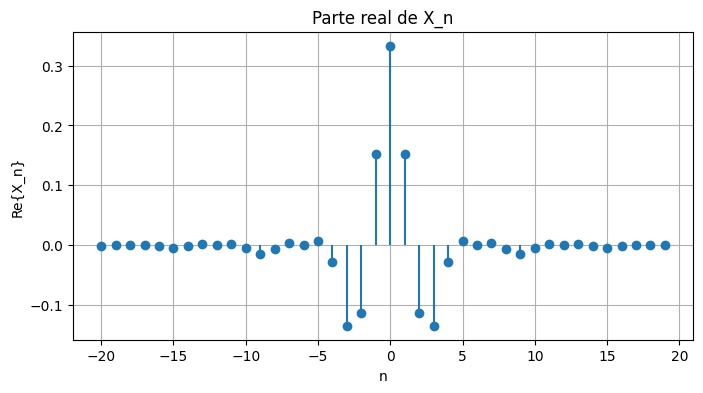

In [23]:
# GRÁFICOS ESTÁTICOS DE LOS COEFICIENTES Xn

plt.figure(figsize=(8,4))
plt.stem(n_list, np.real(Xn), basefmt=" ")
plt.title('Parte real de X_n')
plt.xlabel('n')
plt.ylabel('Re{X_n}')
plt.grid(True)
plt.show()

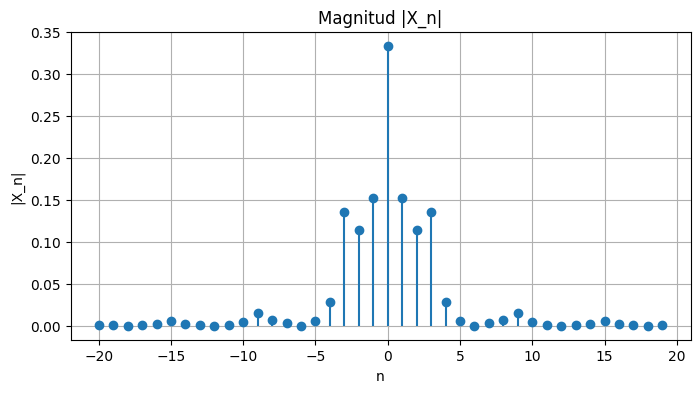

In [24]:
plt.figure(figsize=(8,4))
plt.stem(n_list, np.abs(Xn), basefmt=" ")
plt.title('Magnitud |X_n|')
plt.xlabel('n')
plt.ylabel('|X_n|')
plt.grid(True)
plt.show()

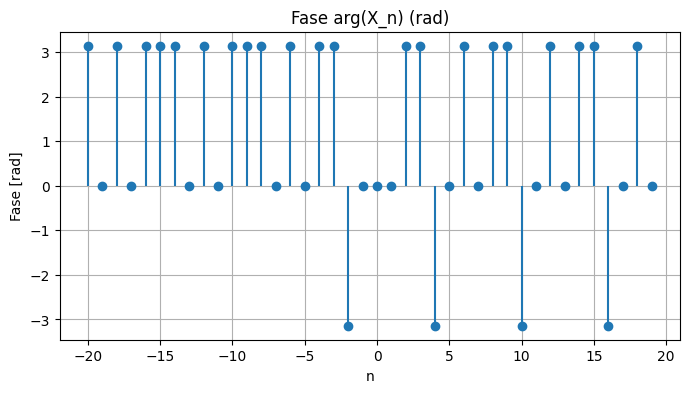

In [25]:
plt.figure(figsize=(8,4))
plt.stem(n_list, np.angle(Xn), basefmt=" ")
plt.title('Fase arg(X_n) (rad)')
plt.xlabel('n')
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.show()

In [26]:
# CÁLCULO DEL ERROR RELATIVO

# Potencia promedio de la señal original (energía total / periodo)
Px = (1 / T) * np.trapz(np.abs(x)**2, t)   # integración numérica de |x(t)|²

# Definimos la función interactiva para evaluar el error al reconstruir con Na armónicos
def pltest(Na=1):
    """
    Calcula y grafica la reconstrucción parcial de la señal x(t) usando Na armónicos.
    Muestra el error relativo Er = 1 - (energía reconstruida / energía total).
    """
    # Armónicos que se usarán (de -Na a +Na)
    ind = np.arange(len(n_list)//2 - Na, len(n_list)//2 + Na + 1)

    # Energía reconstruida a partir de los coeficientes Xn seleccionados
    Er = 1 - np.sum(np.abs(Xn[ind])**2) / Px

    # Reconstrucción de la señal usando la serie de Fourier parcial
    xe = np.zeros_like(t, dtype=complex)
    for k in ind:
        n = n_list[k]
        xe += Xn[k] * np.exp(1j * n * omega0 * t)
    xe = np.real(xe)

    # Gráficas comparativas
    plt.figure(figsize=(8,4))
    plt.plot(t, xe, 'b', label='$x_e(t)$ (reconstruida)')
    plt.plot(t, x, 'r', label='$x(t)$ (original)')
    plt.title(r'$E_r$ = %.2f [%%]' % (100 * Er), fontsize=16)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Control interactivo con barra deslizante para elegir Na
interact(pltest, Na=(1, len(n_list)//2, 1))


/tmp/ipython-input-197422858.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Px = (1 / T) * np.trapz(np.abs(x)**2, t)   # integración numérica de |x(t)|²


interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>